
# Logistic Regression on titanic dataset

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description
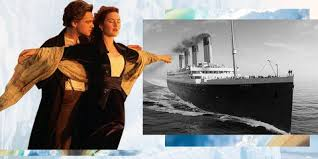

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

In [1]:
#### Importing packages                                          

import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [2]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [3]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [4]:
median_age = titanic_data.Age.median()
median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
titanic_data.Fare.fillna(median_fare, inplace = True)

In [5]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

- Creating a new feature named __FamilySize__.

In [6]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [7]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [8]:
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [9]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


- __Dummification__ of __GenderClass__ & __Embarked__.

In [10]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

- __Dropping__ columns __'Name' , 'Ticket' , 'Sex' , 'SibSp' and 'Parch'__ 

In [11]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1.0, 'Correlation between features')

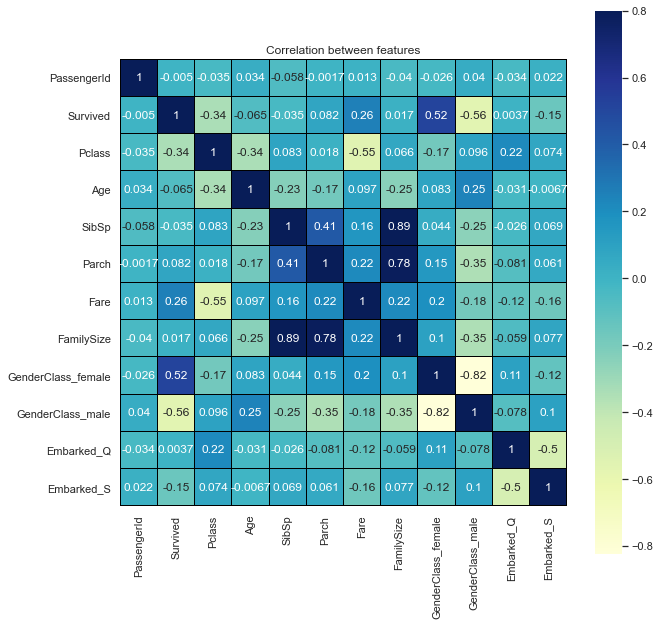

In [12]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section4></a>

## 4. Logistic Regression

<a id=section401></a>

<a id=section404></a>

## 4.4 Preparing X and y using pandas

In [13]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [14]:
y = titanic.Survived 

<a id=section405></a>

## 4.5 Splitting X and y into training and test datasets.

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
print(X_train.shape)
print(y_train.shape)

<a id=section406></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

<a id=section407></a>

## 4.7 Using the Model for Prediction

In [ ]:
y_pred_train = logreg.predict(X_train)  

In [ ]:
y_pred_test = logreg.predict(X_test)                                                           # make predictions on the testing set

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id = section5></a>

<a id=section501></a>

### 5.1 Model Evaluation using __accuracy classification score__

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

<a id = section502></a>

### 5.2 Model Evaluation using confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

In [ ]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

This means 93 + 48 = __141 correct predictions__ & 25 + 13 = __38 false predictions__.

__Adjusting Threshold__ for predicting Died or Survived.

- In the section [4.7](#section4.7) we have used, __.predict__ method for classification. This method takes 0.5 as the default threshhod for prediction.<br/>
- Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model. <br/>
- For this we are going to use __.predict_proba__ method instead of using .predict method. 

Setting the threshold to __0.75__

In [ ]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

The accuracy have been __reduced__ significantly changing from __0.79 to 0.73__. Hence, 0.75 is __not a good threshold__ for our model. 

Setting the threshold to __0.25__

In [ ]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.5,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

The accuracy have been __reduced__, changing from __0.79 to 0.75__. Hence, 0.25 is also __not a good threshold__ for our model. <br/>
Later on we will see methods to identify the best threshold. 